In [2]:
import pandas as pd

df_sp = pd.read_csv("spotify_churn_dataset.csv")

df_sp.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Dimensiones del dataset:", df_sp.shape)
print("\nInformación general del dataset:")
df_sp.info()

print("\nEstadísticas descriptivas:")
display(df_sp.describe(include='all').T)

Dimensiones del dataset: (8000, 12)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB

Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,8000.0,NaN,NaN,NaN,4000.5,2309.54541,1.0,2000.75,4000.5,6000.25,8000.0
gender,8000,3,Male,2691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,8000.0,NaN,NaN,NaN,37.662125,12.740359,16.0,26.0,38.0,49.0,59.0
country,8000,8,AU,1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_type,8000,4,Premium,2115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listening_time,8000.0,NaN,NaN,NaN,154.06825,84.015596,10.0,81.0,154.0,227.0,299.0
songs_played_per_day,8000.0,NaN,NaN,NaN,50.12725,28.449762,1.0,25.0,50.0,75.0,99.0
skip_rate,8000.0,NaN,NaN,NaN,0.300127,0.173594,0.0,0.15,0.3,0.45,0.6
device_type,8000,3,Desktop,2778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ads_listened_per_week,8000.0,NaN,NaN,NaN,6.943875,13.617953,0.0,0.0,0.0,5.0,49.0


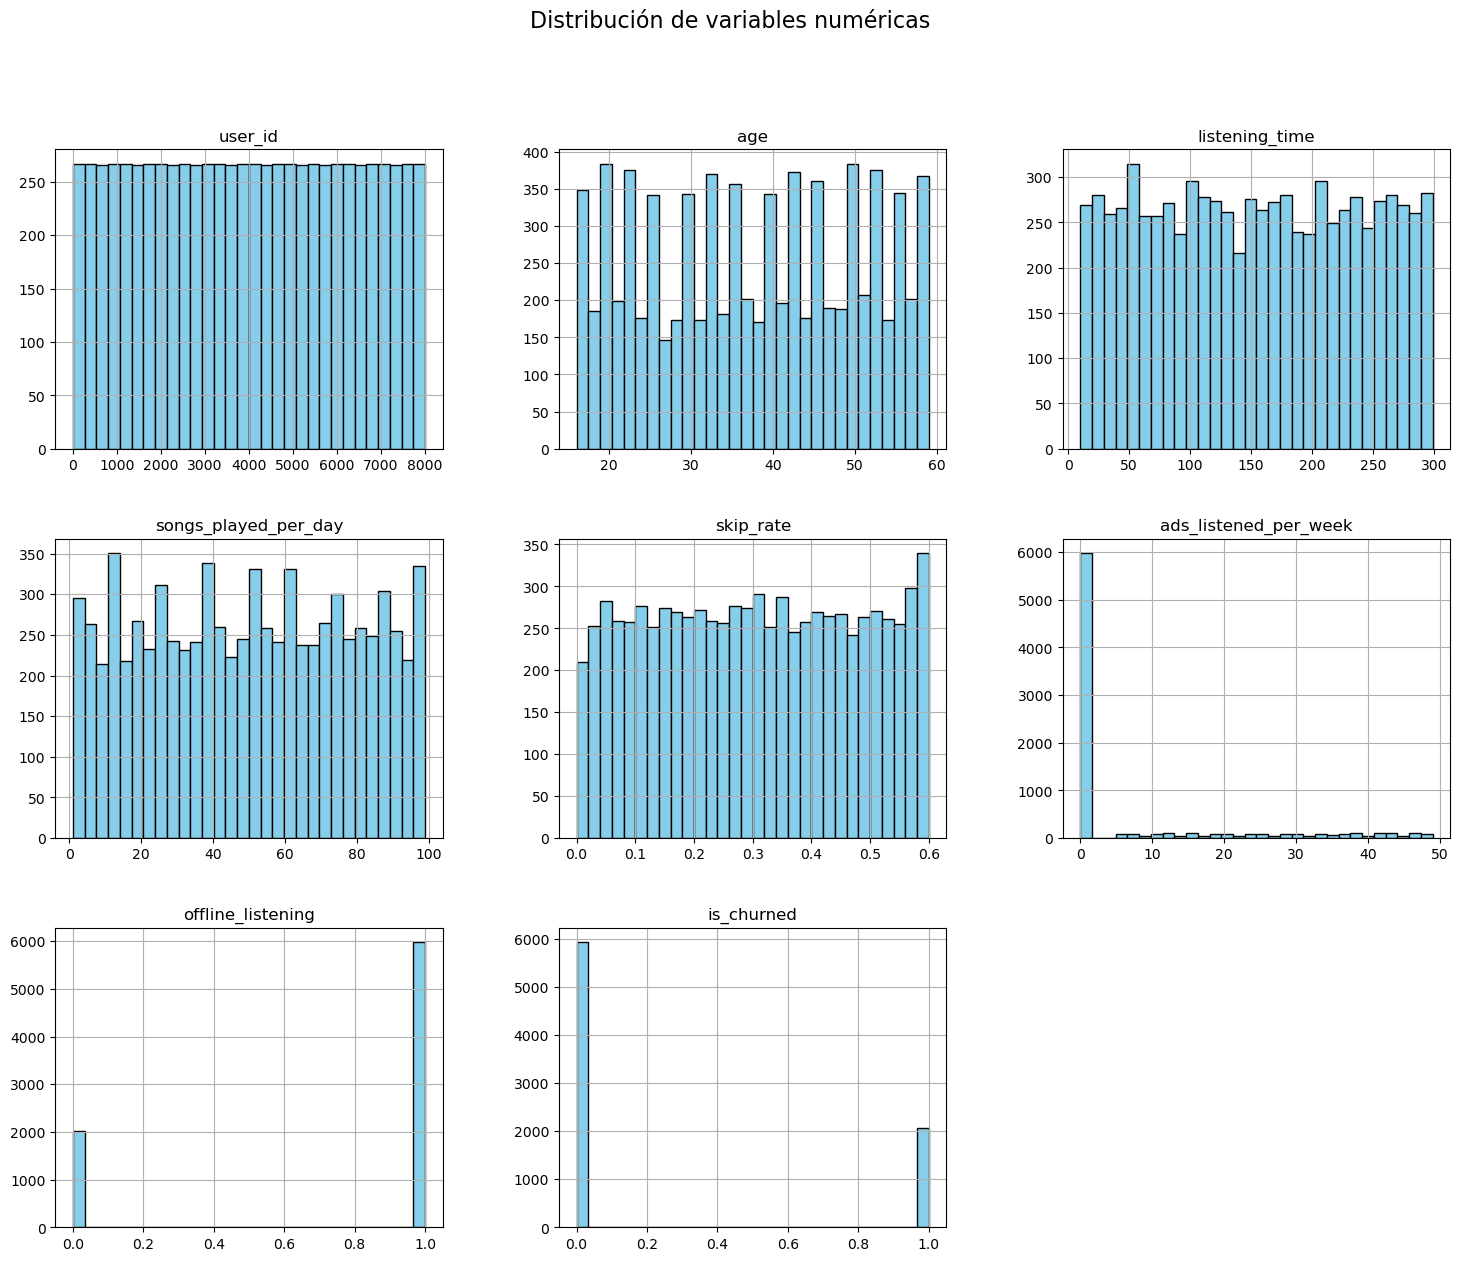

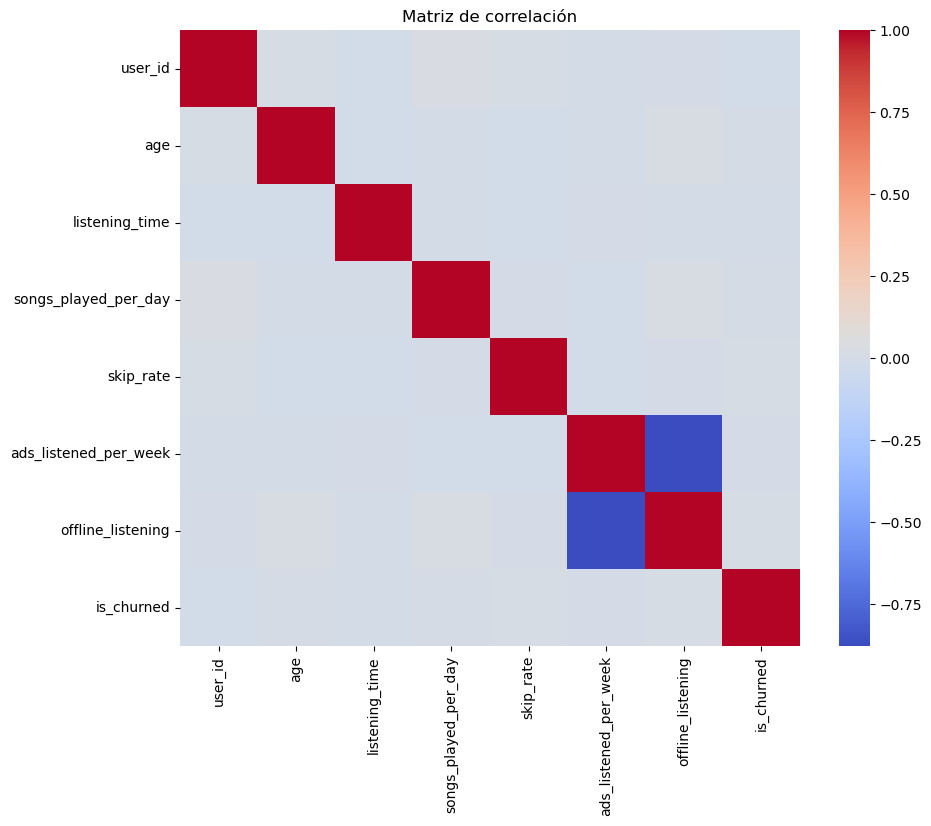

In [4]:
df_sp.hist(figsize=(18, 14), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.show()

# === Matriz de correlación ===
plt.figure(figsize=(10, 8))
sns.heatmap(df_sp.select_dtypes(include='number').corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación")
plt.show()

In [5]:
num_cols = df_sp.select_dtypes(include='number').columns
outlier_report = []

for col in num_cols:
    Q1 = df_sp[col].quantile(0.25)
    Q3 = df_sp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_sp[(df_sp[col] < lower) | (df_sp[col] > upper)]
    outlier_percentage = len(outliers) / len(df_sp) * 100
    outlier_report.append([col, round(outlier_percentage, 2)])

outlier_df = pd.DataFrame(outlier_report, columns=["Columna", "% de Outliers"])
display(outlier_df.sort_values("% de Outliers", ascending=False))

,Columna,% de Outliers
5,ads_listened_per_week,21.04
0,user_id,0.00
1,age,0.00
2,listening_time,0.00
3,songs_played_per_day,0.00
4,skip_rate,0.00
6,offline_listening,0.00
7,is_churned,0.00


In [6]:
missing_pct_sp = df_sp.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
display(missing_pct_sp.sort_values(ascending=False))

cols_high_nulls_sp = missing_pct_sp[missing_pct_sp > 10].index.tolist()
print("\nColumnas con más del 10% de valores perdidos:", cols_high_nulls_sp)

for col in df_sp.columns:
    if df_sp[col].isna().sum() > 0:
        if df_sp[col].dtype == 'object':
            df_sp[col].fillna(df_sp[col].mode()[0], inplace=True)
        else:
            df_sp[col].fillna(df_sp[col].median(), inplace=True)

print("\nTotal de valores nulos después de la imputación:", df_sp.isna().sum().sum())


Porcentaje de valores faltantes por columna:


user_id                  0.0
gender                   0.0
age                      0.0
country                  0.0
subscription_type        0.0
listening_time           0.0
songs_played_per_day     0.0
skip_rate                0.0
device_type              0.0
ads_listened_per_week    0.0
offline_listening        0.0
is_churned               0.0
dtype: float64


Columnas con más del 10% de valores perdidos: []

Total de valores nulos después de la imputación: 0


In [6]:
from scipy.stats.mstats import winsorize

# Seleccionar columnas numéricas
num_cols_sp = df_sp.select_dtypes(include='number').columns

# Aplicar winsorize a cada columna numérica (recorta el 5% inferior y superior)
for col in num_cols_sp:
    df_sp[col] = winsorize(df_sp[col], limits=[0.05, 0.05])

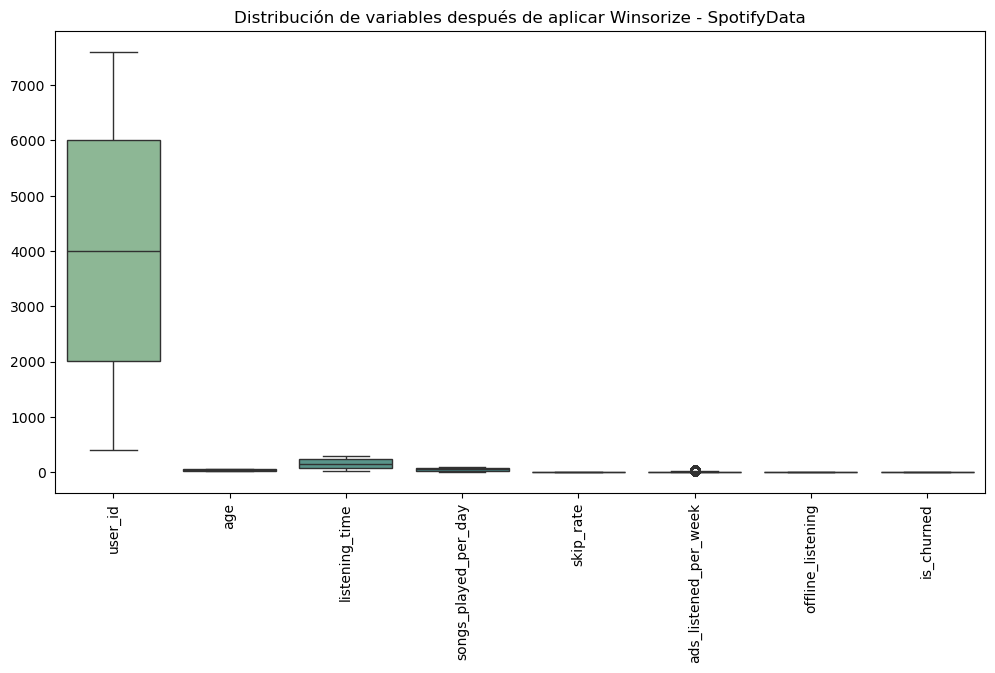

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sp[num_cols_sp], palette="crest")
plt.title("Distribución de variables después de aplicar Winsorize - SpotifyData")
plt.xticks(rotation=90)
plt.show()


In [10]:
df_sp[num_cols_sp].describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,8000.0,4000.500000,2276.903157,401.00,2000.75,4000.5,6000.25,7600.00
age,8000.0,37.658375,12.524707,18.00,26.00,38.0,49.00,57.00
listening_time,8000.0,154.111125,82.768548,25.00,81.00,154.0,227.00,285.00
songs_played_per_day,8000.0,50.164250,28.060648,6.00,25.00,50.0,75.00,95.00
skip_rate,8000.0,0.300124,0.171137,0.03,0.15,0.3,0.45,0.57
ads_listened_per_week,8000.0,6.736000,13.042539,0.00,0.00,0.0,5.00,41.00
offline_listening,8000.0,0.747750,0.434331,0.00,0.00,1.0,1.00,1.00
is_churned,8000.0,0.258875,0.438044,0.00,0.00,0.0,1.00,1.00


In [8]:
import pandas as pd

df_sp_enc = df_sp.copy()

# Target ya es 0/1 → no tocar
target_sp = "is_churned"

# 1) Categóricas
cat_cols_sp = df_sp_enc.select_dtypes(include="object").columns.tolist()
print("Categóricas detectadas:", cat_cols_sp)

# 2) (Probablemente todas de baja cardinalidad: gender, country, subscription_type, device_type)
df_sp_enc = pd.get_dummies(df_sp_enc, columns=cat_cols_sp, drop_first=True)

print("Shape después de encoding:", df_sp_enc.shape)
df_sp_enc.head()

Categóricas detectadas: ['gender', 'country', 'subscription_type', 'device_type']
Shape después de encoding: (8000, 22)


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,gender_Male,gender_Other,...,country_FR,country_IN,country_PK,country_UK,country_US,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
0,401,54,26,23,0.20,31,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,401,33,141,62,0.34,0,1,0,False,True,...,False,False,False,False,False,False,False,False,False,True
2,401,38,199,38,0.04,0,1,1,True,False,...,False,False,False,False,False,False,True,False,True,False
3,401,22,36,6,0.31,0,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
4,401,29,250,57,0.36,0,1,1,False,True,...,False,False,False,False,True,False,False,False,True,False


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una copia para no alterar el original
df_sp_norm = df_sp_enc.copy()

# Definimos el escalador
scaler_sp = MinMaxScaler()

# Excluimos la columna objetivo (target)
target_sp = "is_churned"
cols_to_scale_sp = df_sp_norm.columns.drop(target_sp)

# Aplicamos la normalización
df_sp_norm[cols_to_scale_sp] = scaler_sp.fit_transform(df_sp_norm[cols_to_scale_sp])

# Mostramos rangos de valores
print("Rango después de la normalización (SpotifyData):")
print(df_sp_norm[cols_to_scale_sp].describe().loc[["min", "max"]])

# Mostramos primeras filas
df_sp_norm.head()

# Guardamos el dataset procesado
df_sp_norm.to_csv("spotify_churn_normalized.csv", index=False)

Rango después de la normalización (SpotifyData):
     user_id  age  listening_time  songs_played_per_day  skip_rate  \
min      0.0  0.0             0.0                   0.0        0.0   
max      1.0  1.0             1.0                   1.0        1.0   

     ads_listened_per_week  offline_listening  gender_Male  gender_Other  \
min                    0.0                0.0          0.0           0.0   
max                    1.0                1.0          1.0           1.0   

     country_CA  ...  country_FR  country_IN  country_PK  country_UK  \
min         0.0  ...         0.0         0.0         0.0         0.0   
max         1.0  ...         1.0         1.0         1.0         1.0   

     country_US  subscription_type_Free  subscription_type_Premium  \
min         0.0                     0.0                        0.0   
max         1.0                     1.0                        1.0   

     subscription_type_Student  device_type_Mobile  device_type_Web  
min          